# Exploratory Data Analysis of Stroke Dataset in R

### Author: datadave333@gmail.com

## Description of Data

*The dataset is from Kaggle, called "Stroke Prediction Dataset", found at this link: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset.*   

*How this dataset was obtained, and the details of how each feature was measured is deemed "confidential" by the author. There are features 11 features related to life and health status: gender, age, hypertension, heart_disease, ever_married,	work_type, Residence_type,	avg_glucose_level, bmi, smoking_status, stroke.*  

*Catagorical: gender, ever_married, work_type, Residence_type, smoking_status  
One-hot:  hypertension, heart_disease, stroke, (Yes=1, No=0)  
Numerical: avg_glucose_level, bmi, age.*




## To Run:
*Under "Importing and data summary", enter the file path to the csv titled "healthcare-dataset-stroke-data" (included in repo, or grab from Kaggle using the link above).*

## EDA Results

### Strongest Correlation between numerical features was between age and bmi at 0.33, which is relatively weak:

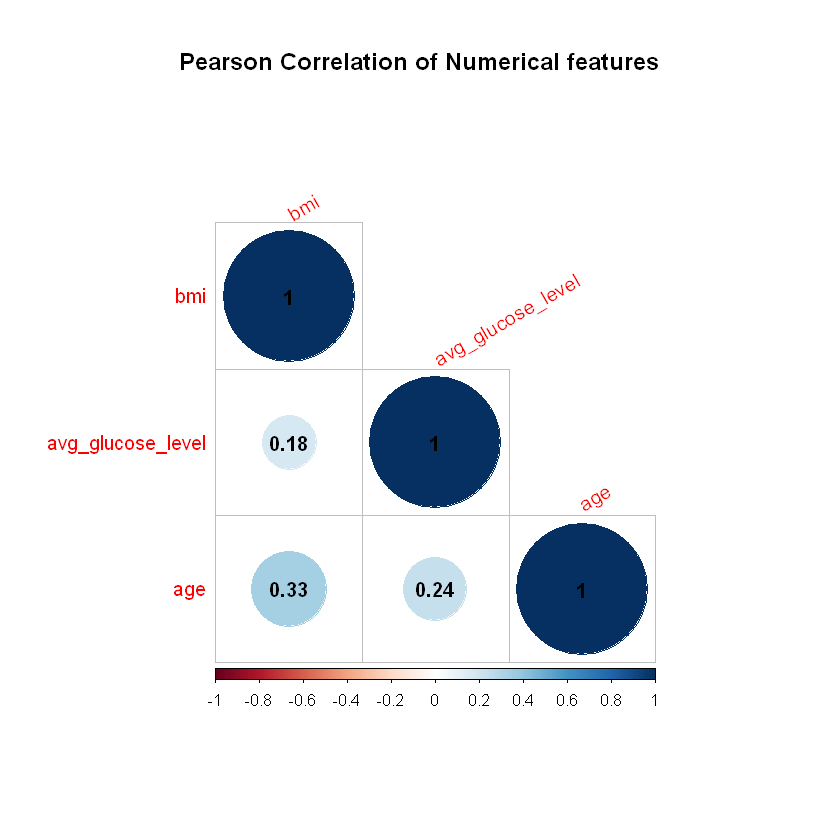

### All but gender and residence type were shown to be significant with regards to stroke (p-values well below 0.05 after chi2 test). The following features showed the highest range of stroke percentages across their values (1 = had stroke): 

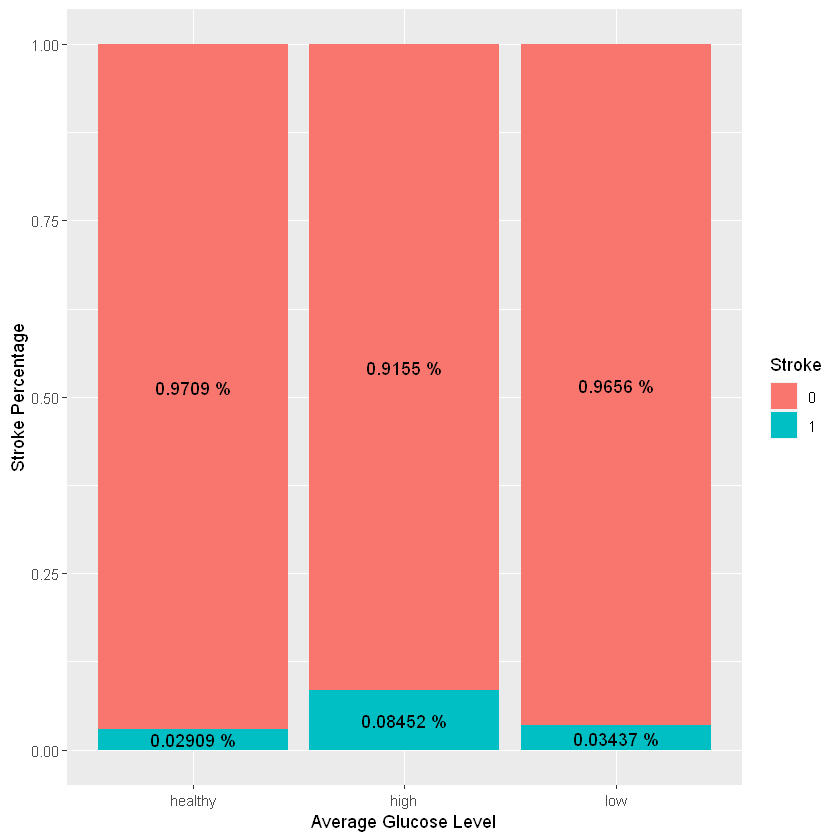

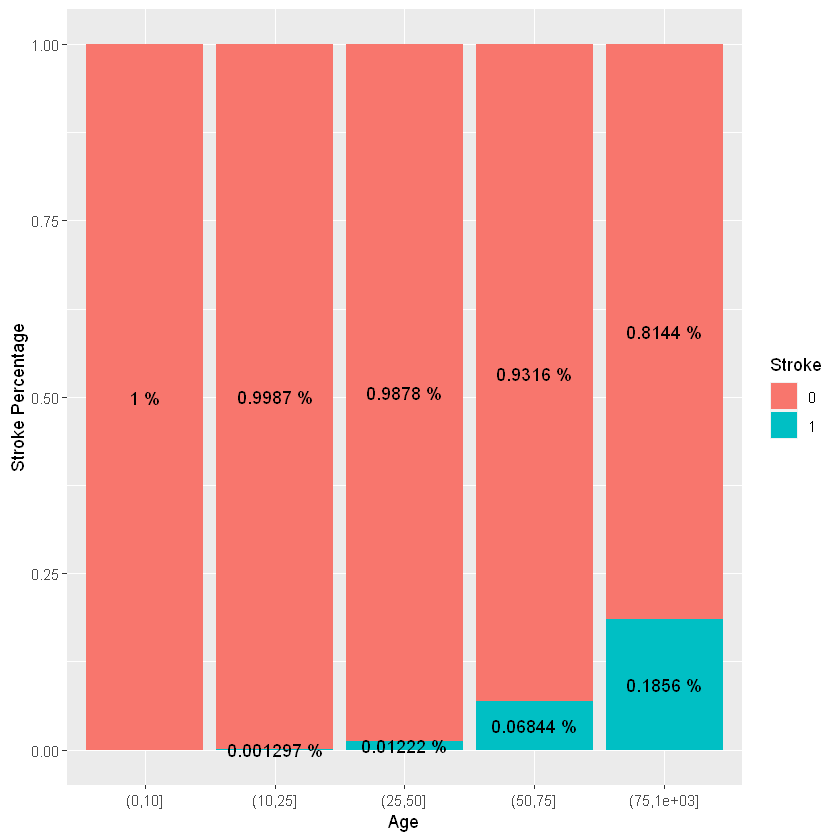

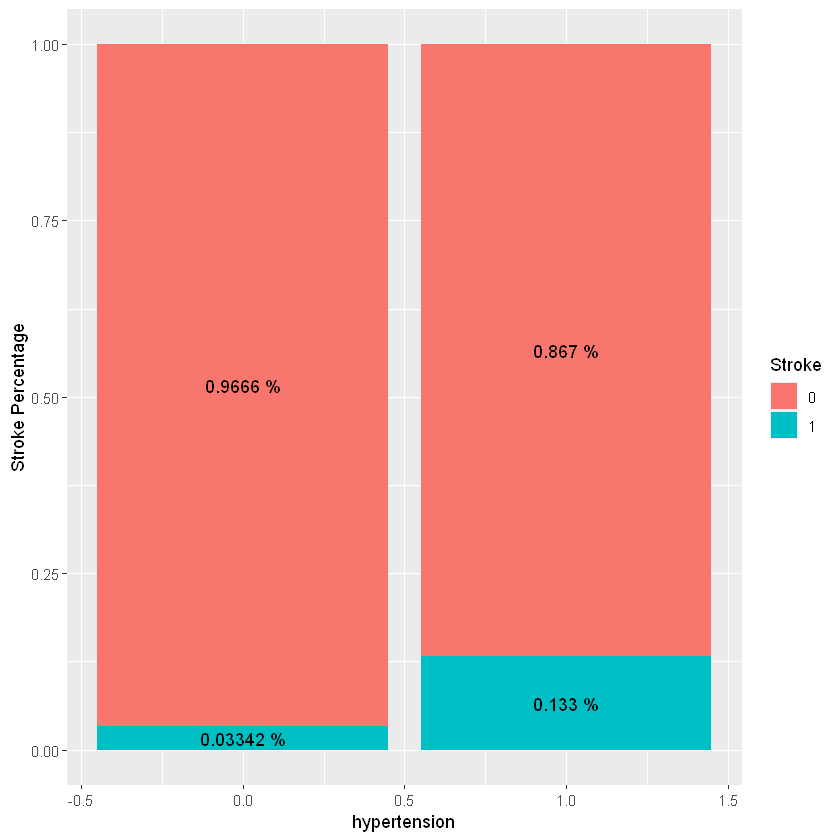

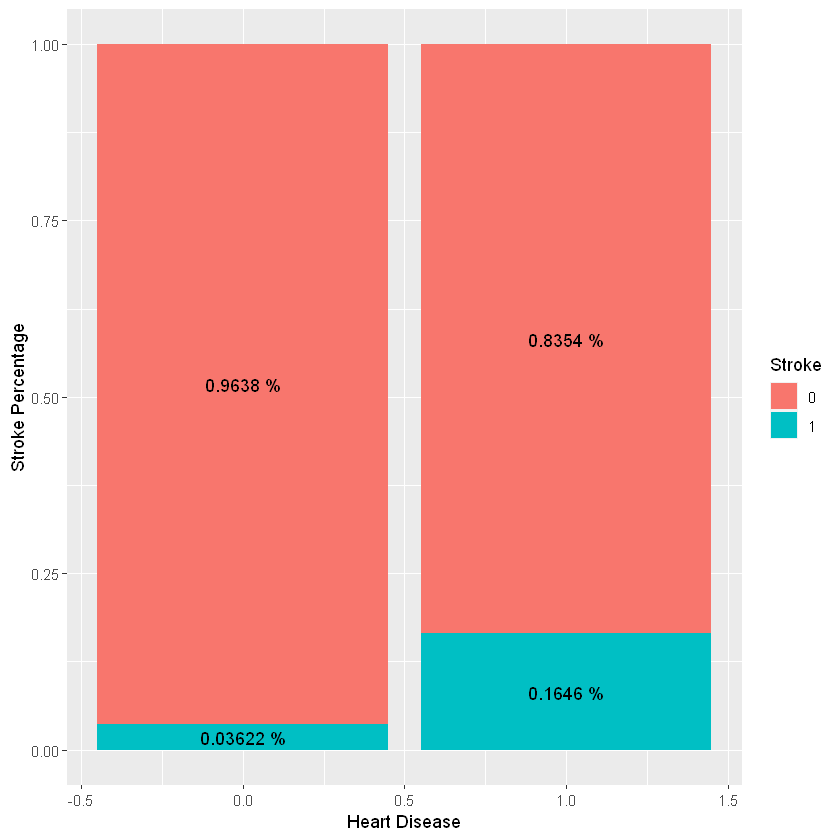

### From Multi-Level Density Plots:

* Most of the high glucose sample is populated by either children or people over 50 years old.
* Most of our healthy bmi sample between 25 and 75 years old is populated by females. 
* There is a slight peak in the amount of people populating our overweight/obese samples at around 55 years old. 
* Besides adolescents, most of our formerly smoked sample is populated by people 50-80 years old. 
* Much of our currently smoking sample is populated by people working government jobs/self employed and 50-65 years old. 
* There are many underweight people working government jobs at 60 years old.

### ##########################################################################################

### Importing and data summary

In [1]:
library(dplyr)
library(ggplot2)
library(patchwork)
library(corrplot)
library(ggridges)


s_data = read.table(file=file.choose(), header=T, sep=",", stringsAsFactors = F)
head(s_data)

print(summary(s_data))

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'patchwork' was built under R version 3.6.3"corrplot 0.92 loaded
Warning message:
"package 'ggridges' was built under R version 3.6.3"

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


       id           gender               age         hypertension    
 Min.   :   67   Length:5110        Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Class :character   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Mode  :character   Median :45.00   Median :0.00000  
 Mean   :36518                      Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                      3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                      Max.   :82.00   Max.   :1.00000  
 heart_disease     ever_married        work_type         Residence_type    
 Min.   :0.00000   Length:5110        Length:5110        Length:5110       
 1st Qu.:0.00000   Class :character   Class :character   Class :character  
 Median :0.00000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.05401                                                           
 3rd Qu.:0.00000                                                           
 Max.   :1.00000                                      

### Looking at missing values

In [2]:
is.na(select(s_data, bmi)) #all false since missing values were filled to csv with string, "N/A"


filter(s_data, bmi=="N/A") #here they are now lets just ignore them, 200/5110 rows to drop
nrow(filter(s_data, bmi=="N/A")) 

select(s_data, bmi) %>% filter(bmi=="N/A") 

bmi
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
27419,Female,59.00,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1
8213,Male,78.00,0,1,Yes,Private,Urban,219.84,N/A,Unknown,1
25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,N/A,Unknown,1
61843,Male,58.00,0,0,Yes,Private,Rural,189.84,N/A,Unknown,1
69160,Male,59.00,0,0,Yes,Private,Rural,211.78,N/A,formerly smoked,1
1845,Female,63.00,0,0,Yes,Private,Urban,90.90,N/A,formerly smoked,1
37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,N/A,Unknown,1
18587,Female,76.00,0,0,No,Private,Urban,89.96,N/A,Unknown,1
15102,Male,78.00,1,0,Yes,Private,Urban,75.32,N/A,formerly smoked,1


[1] 201

bmi
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A


Only bmi has missing values

### Dropping all rows with bmi = na (around 200 rows to drop out of 5000)

In [3]:
#removing people with bmi = na
df = filter(s_data, bmi!="N/A")
head(df)
print(summary(df))

#evidently bmi was class "character"
df$bmi <- as.numeric(df$bmi) #now it's numerical

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


       id           gender               age         hypertension    
 Min.   :   77   Length:4909        Min.   : 0.08   Min.   :0.00000  
 1st Qu.:18605   Class :character   1st Qu.:25.00   1st Qu.:0.00000  
 Median :37608   Mode  :character   Median :44.00   Median :0.00000  
 Mean   :37064                      Mean   :42.87   Mean   :0.09187  
 3rd Qu.:55220                      3rd Qu.:60.00   3rd Qu.:0.00000  
 Max.   :72940                      Max.   :82.00   Max.   :1.00000  
 heart_disease    ever_married        work_type         Residence_type    
 Min.   :0.0000   Length:4909        Length:4909        Length:4909       
 1st Qu.:0.0000   Class :character   Class :character   Class :character  
 Median :0.0000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.0495                                                           
 3rd Qu.:0.0000                                                           
 Max.   :1.0000                                             

### Scatters Between Numerical Features

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


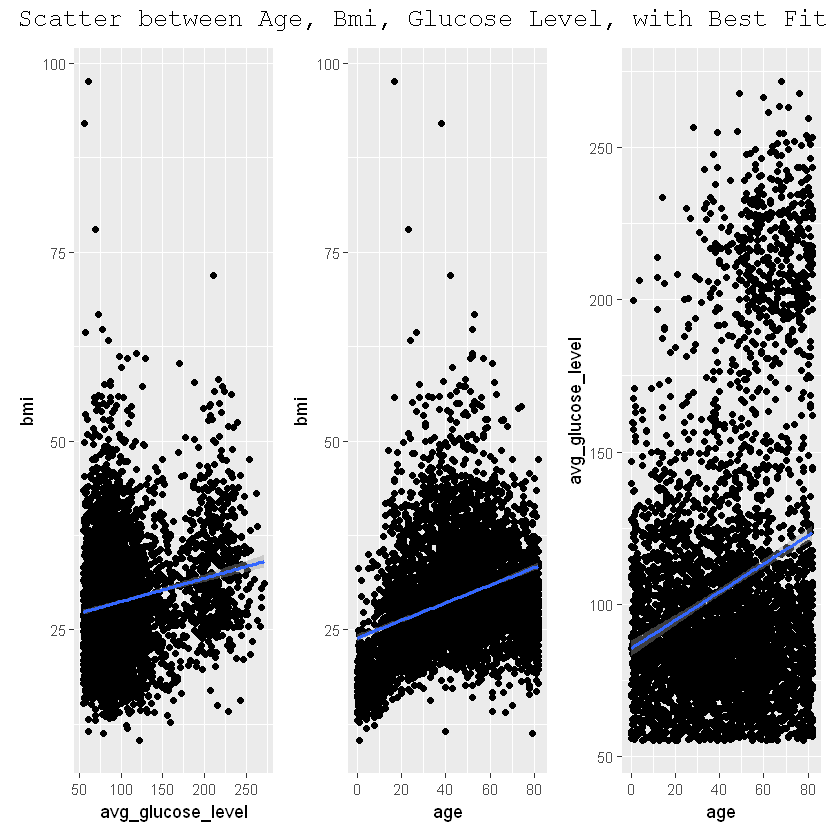

In [4]:
#############regression/pairplot
num_df <- select(df, bmi, avg_glucose_level, age)
#summary(num_df)

reg1 <- ggplot(data=num_df, aes(x=avg_glucose_level, y=bmi)) + geom_point() + geom_smooth(method='lm')
reg2 <- ggplot(data=num_df, aes(x=age, y=bmi)) + geom_point() + geom_smooth(method='lm')
reg3 <- ggplot(data=num_df, aes(x=age, y=avg_glucose_level)) + geom_point() + geom_smooth(method='lm')

reg1 + reg2 + reg3 + plot_annotation(title = "Scatter between Age, Bmi, Glucose Level, with Best Fit", 
                                     theme = theme(plot.title = element_text(size = 15)) & theme(text = element_text('mono')))

We may see linear trends, lets check out the correlation

### Correlation of Numerical features

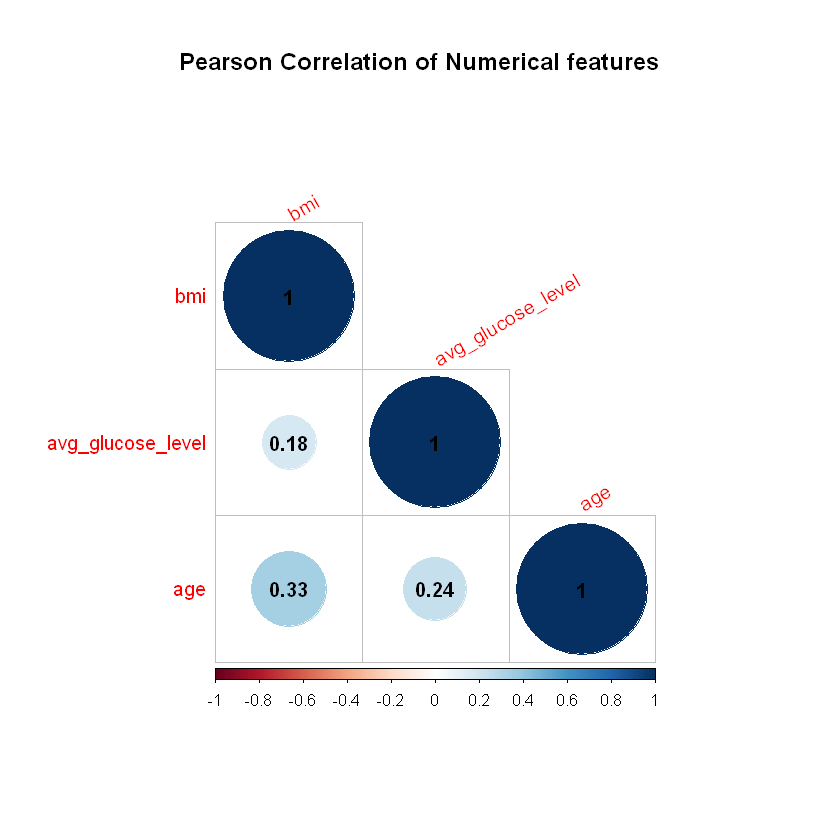

In [5]:
############correlation of numericals
num_df_cor <- cor(num_df)
corrplot(num_df_cor, addCoef.col = 'black', title="Pearson Correlation of Numerical features", mar=c(5,0,5,0), 
         tl.srt = 30, type = "lower") 
 

Strongest Correlation is between age and bmi at 0.33, which is relatively weak.

### Binning

In [6]:
age_vect <- c(as.vector(df$age))
age_bins <- cut(age_vect, c(0, 10, 25, 50, 75, 1000))

bmi_vect <- c(as.vector(df$bmi))
bmi_bins <- cut(bmi_vect, c(0, 18.5, 24.9, 29.9, 1000), labels = c("underweight", "healthy", "overweight", "obese"))

gluc_vect <- c(as.vector(df$avg_glucose_level))
gluc_bins <- cut(gluc_vect, c(0, 80, 120, 1000), labels=c("low", "healthy", "high"))

df$age_bins <- age_bins
df$bmi_bins <- bmi_bins
df$gluc_bins <- gluc_bins

Bmi bins were determined by cdc definitions, but it does not account for age/gender. Average glucose bins are tough because the dataset does not specify how the levels were measured, for instance before or after eating. A quick search stated that healthy blood glucose before eating is around 70 at the low end, and after eating would be around 140 at the high end. I went and called "healthy" to be somewhere in that range. 

### Distributions of Features and Stroke Ratios per Feature

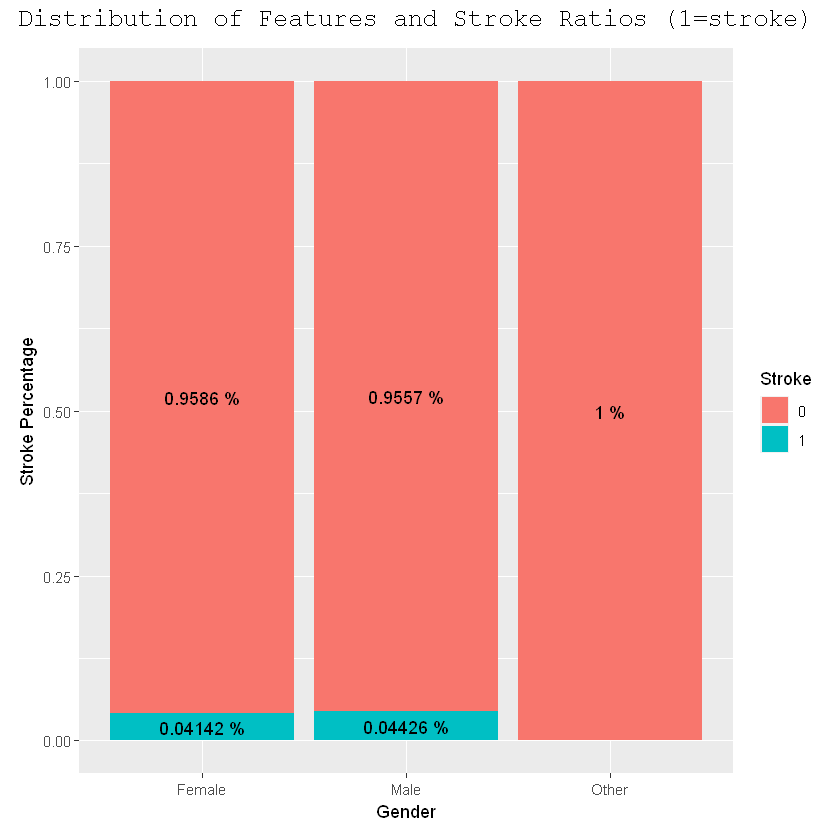

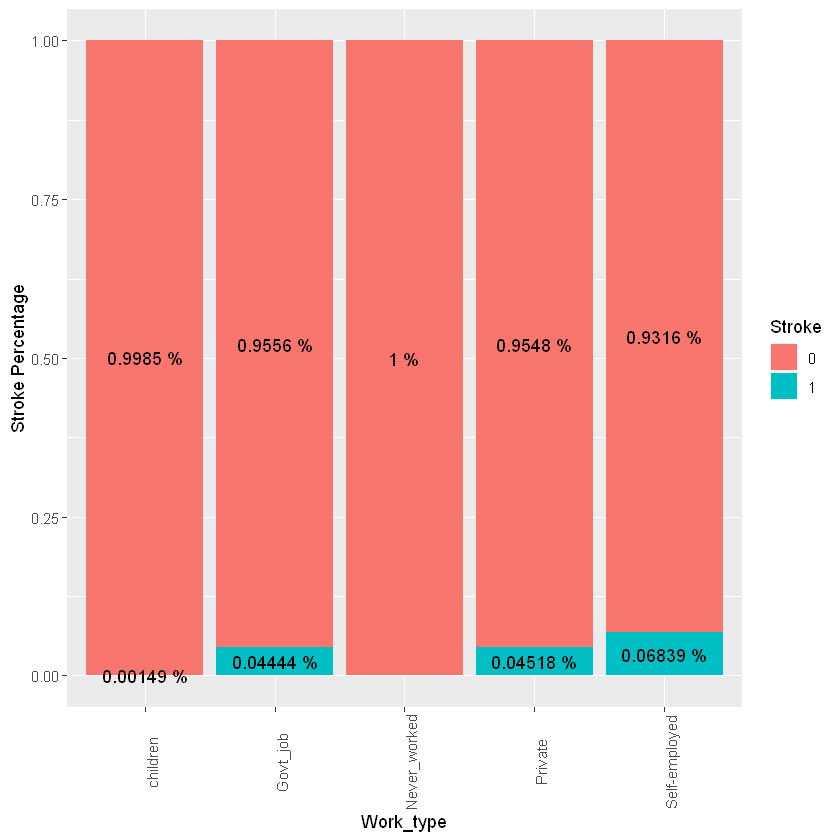

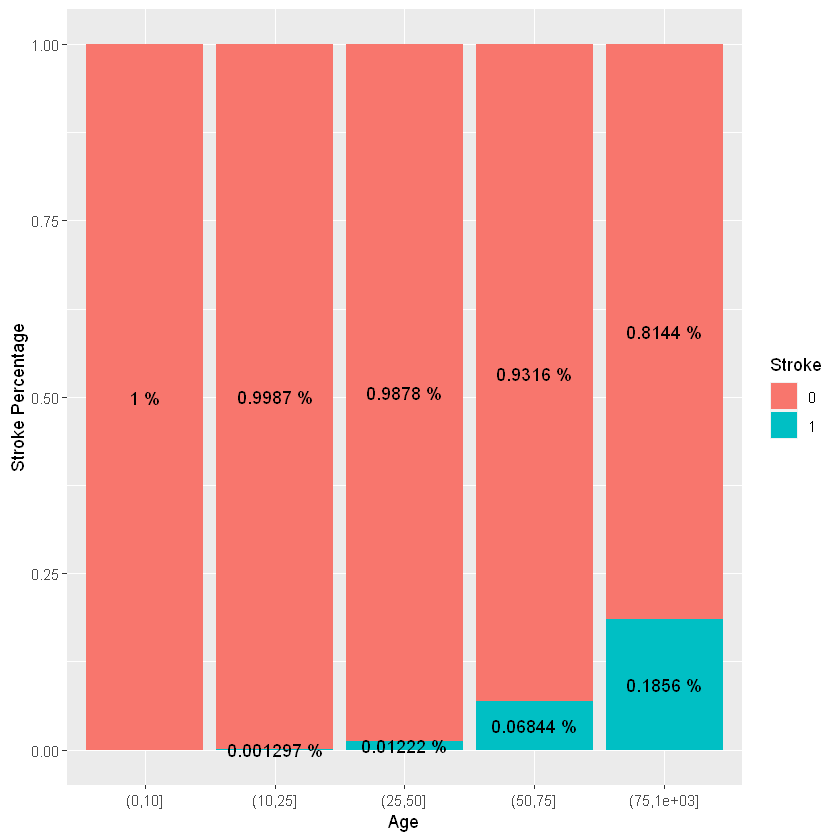

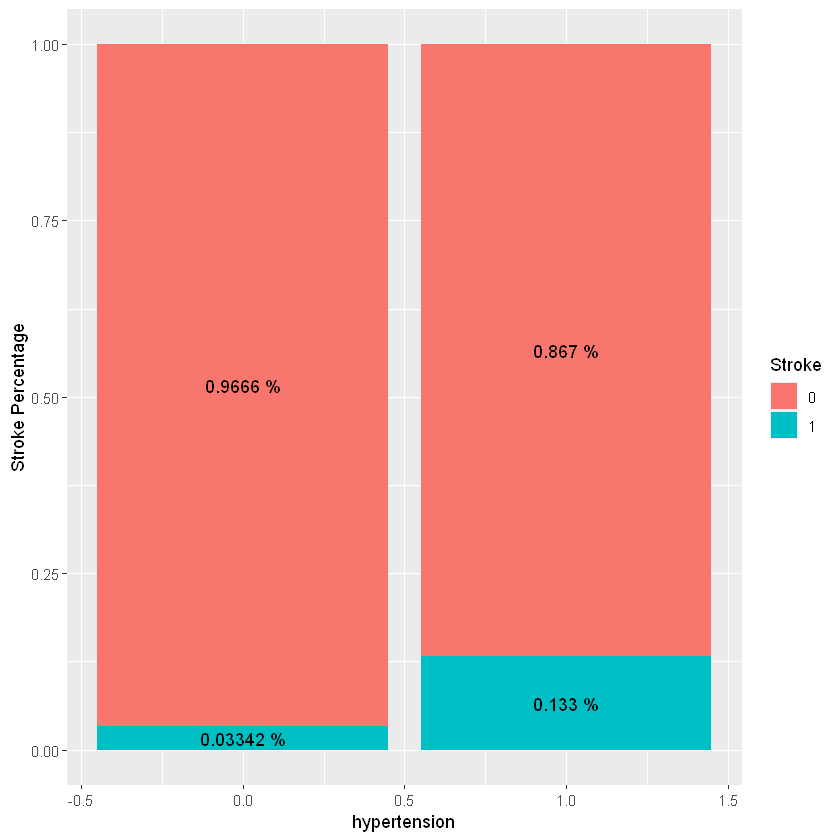

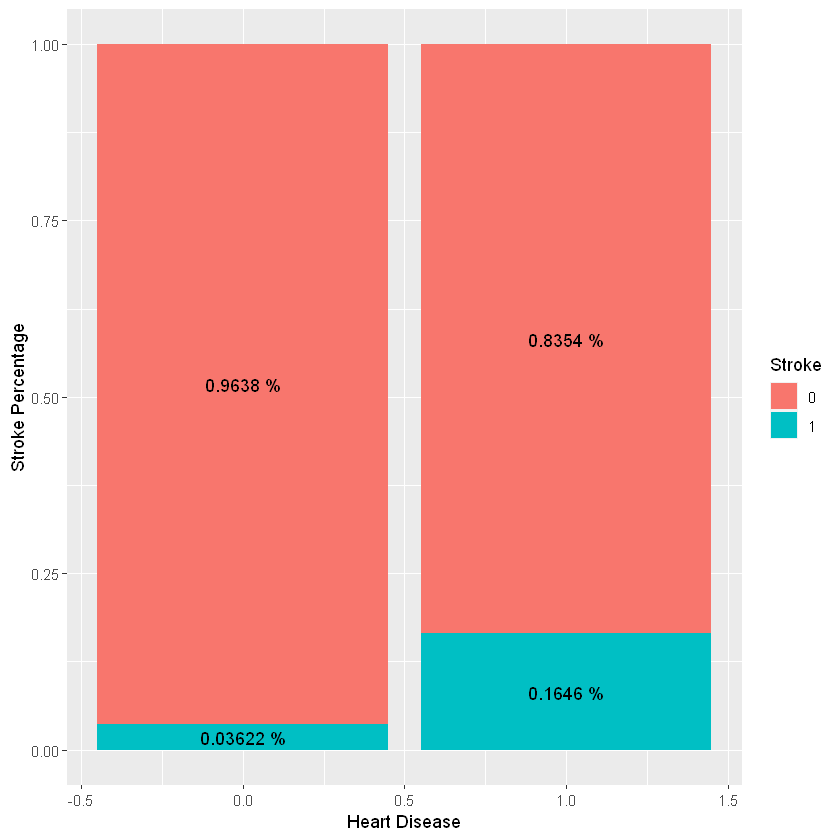

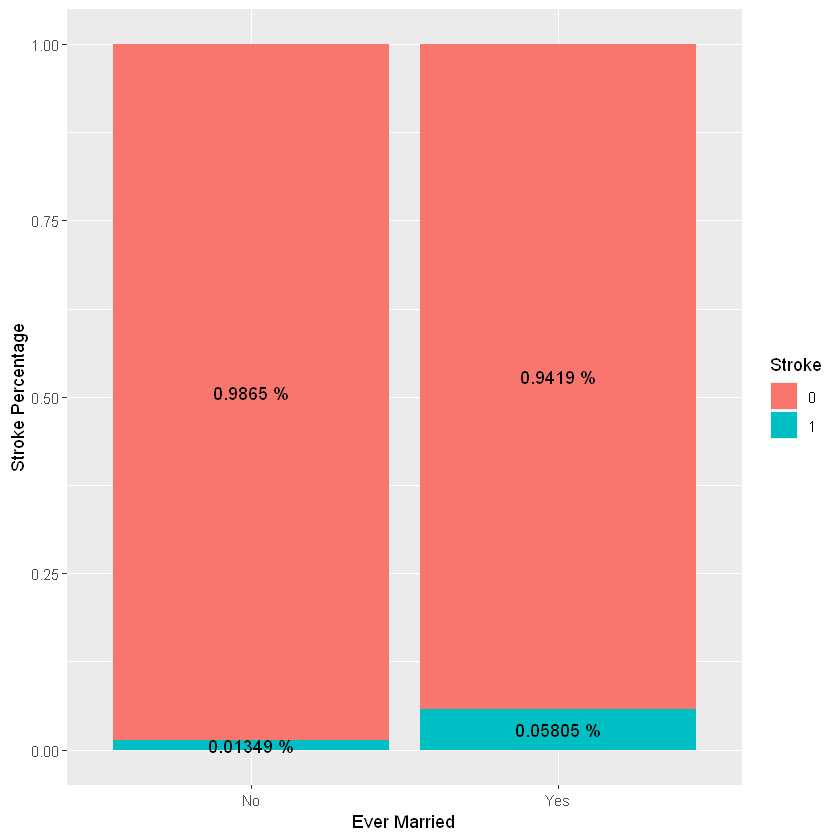

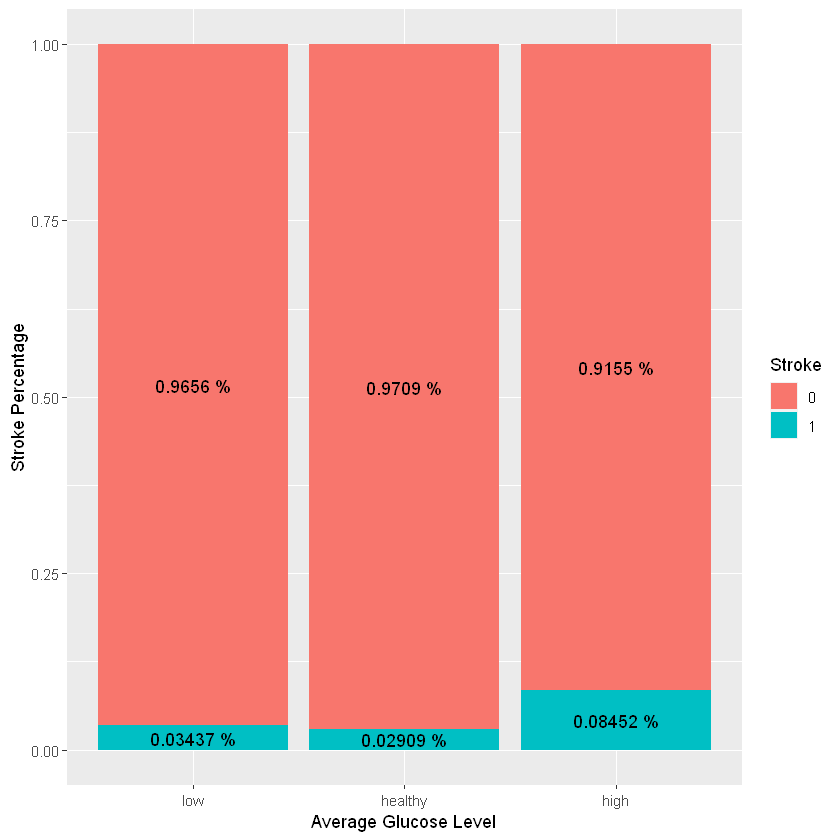

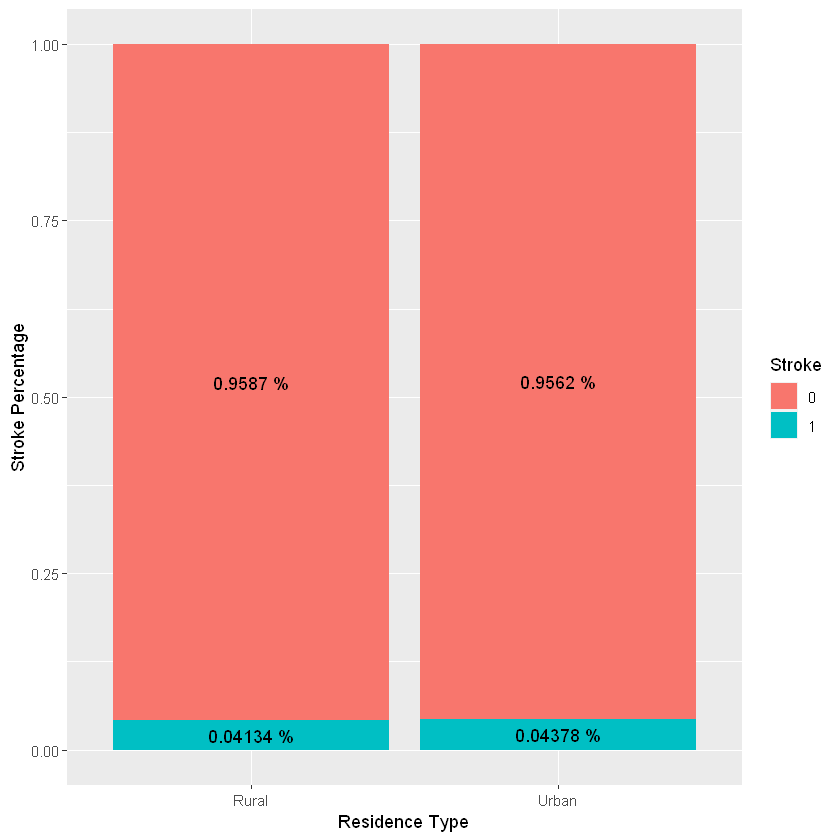

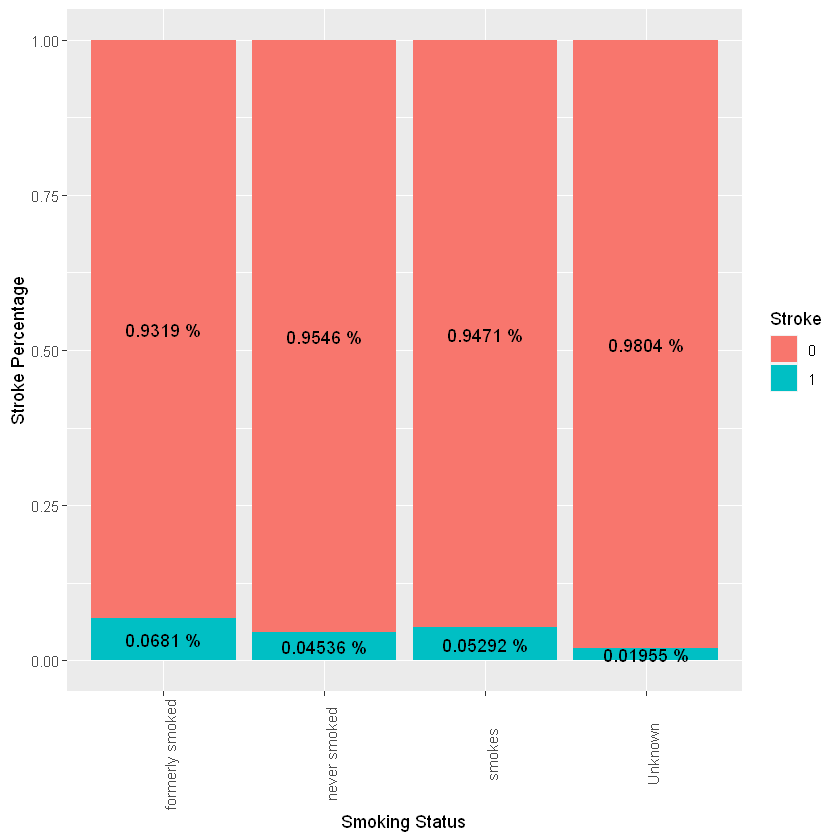

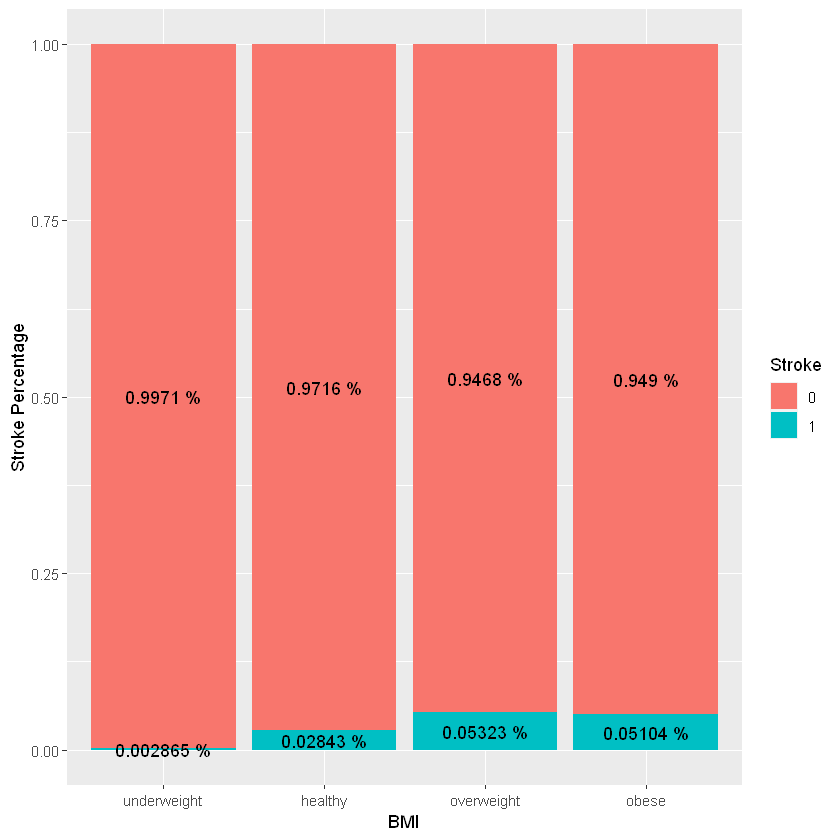

In [7]:
col_names= c("gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", 
             "Residence_type", "avg_glucose_level", "bmi", "smoking_status", "stroke")

dfgend <- df %>% group_by(gender) %>% count(stroke) %>% mutate(Percent = signif((n/sum(n)), digits=4))
dfwt <- df %>% group_by(work_type) %>% count(stroke) %>% mutate(Percent = signif((n/sum(n)), digits=4))
dfage <- df %>% group_by(age_bins) %>% count(stroke) %>% mutate(Percent = signif((n/sum(n)), digits=4))
dfht <- df %>% group_by(hypertension) %>% count(stroke) %>% mutate(Percent = signif((n/sum(n)), digits=4))
dfhd <- df %>% group_by(heart_disease) %>% count(stroke) %>% mutate(Percent = signif((n/sum(n)), digits=4))
dfmar <- df %>% group_by(ever_married) %>% count(stroke) %>% mutate(Percent = signif((n/sum(n)), digits=4))
dfgluc<- df %>% group_by(gluc_bins) %>% count(stroke) %>% mutate(Percent = signif((n/sum(n)), digits=4))
dfres <- df %>% group_by(Residence_type) %>% count(stroke) %>% mutate(Percent = signif((n/sum(n)), digits=4))
dfbmi <- df %>% group_by(bmi_bins) %>% count(stroke) %>% mutate(Percent = signif((n/sum(n)), digits=4))
dfst <- df %>% group_by(smoking_status) %>% count(stroke) %>% mutate(Percent = signif((n/sum(n)), digits=4))



ggplot(dfgend, aes(x = gender, y = Percent, fill = factor(stroke)))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = paste(Percent,"%"), y = Percent), position = position_stack(vjust = 0.5)) +
  labs(x = "Gender", y = "Stroke Percentage", fill = "Stroke") + 
  plot_annotation(title = "Distribution of Features and Stroke Ratios (1=stroke)", 
                  theme = theme(plot.title = element_text(size = 15)) & theme(text = element_text('mono')))

ggplot(dfwt, aes(x = work_type, y = Percent, fill = factor(stroke)))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = paste(Percent,"%"), y = Percent), position = position_stack(vjust = 0.5)) +
  labs(x = "Work_type", y = "Stroke Percentage", fill = "Stroke") + 
  theme(axis.text.x = element_text(angle = 90))

ggplot(dfage, aes(x = age_bins, y = Percent, fill = factor(stroke)))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = paste(Percent,"%"), y = Percent), position = position_stack(vjust = 0.5)) +
  labs(x = "Age", y = "Stroke Percentage", fill = "Stroke")

ggplot(dfht, aes(x = hypertension, y = Percent, fill = factor(stroke)))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = paste(Percent,"%"), y = Percent), position = position_stack(vjust = 0.5)) +
  labs(x = "hypertension", y = "Stroke Percentage", fill = "Stroke")

ggplot(dfhd, aes(x = heart_disease, y = Percent, fill = factor(stroke)))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = paste(Percent,"%"), y = Percent), position = position_stack(vjust = 0.5)) +
  labs(x = "Heart Disease", y = "Stroke Percentage", fill = "Stroke")

ggplot(dfmar, aes(x = ever_married, y = Percent, fill = factor(stroke)))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = paste(Percent,"%"), y = Percent), position = position_stack(vjust = 0.5)) +
  labs(x = "Ever Married", y = "Stroke Percentage", fill = "Stroke")

ggplot(dfgluc, aes(x = gluc_bins, y = Percent, fill = factor(stroke)))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = paste(Percent,"%"), y = Percent), position = position_stack(vjust = 0.5)) +
  labs(x = "Average Glucose Level", y = "Stroke Percentage", fill = "Stroke")

ggplot(dfres, aes(x = Residence_type, y = Percent, fill = factor(stroke)))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = paste(Percent,"%"), y = Percent), position = position_stack(vjust = 0.5)) +
  labs(x = "Residence Type", y = "Stroke Percentage", fill = "Stroke")


ggplot(dfst, aes(x = smoking_status, y = Percent, fill = factor(stroke)))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = paste(Percent,"%"), y = Percent), position = position_stack(vjust = 0.5)) +
  labs(x = "Smoking Status", y = "Stroke Percentage", fill = "Stroke") + 
  theme(axis.text.x = element_text(angle = 90))

ggplot(dfbmi, aes(x = bmi_bins, y = Percent, fill = factor(stroke)))+
  geom_bar(stat = "identity")+
  geom_text(aes(label = paste(Percent,"%"), y = Percent), position = position_stack(vjust = 0.5)) +
  labs(x = "BMI", y = "Stroke Percentage", fill = "Stroke")



Males had a very slight higher ratio (found to be insignificant in the next section), and people that are self employed, have married, have heart disease, hypertension, high glucose, formerly smoked, are overweight/obese, and of course are older all had the highest ratio of strokes out of their respective feature values.

Many of these feature values may go hand in hand. For instance older folks are more likely to have smoked and then quit, explaining why "formerly smoked" beats out currently smoking in terms of strokes. The same can be said about age and bieng self employed, ever married, and having heart disease/hypertension/high glucose. 


### Chi2 to see that stroke ratios are significant

In [8]:
chisq.test(df$bmi_bins, df$stroke) #p_val 6.355e-06, significant
chisq.test(df$age_bins, df$stroke) #p_val < 2.2e-16, significant
chisq.test(df$gluc_bins, df$stroke) #p_val 1.995e-13, significant
chisq.test(df$gender, df$stroke) #p_val p-value = 0.87
chisq.test(df$ever_married, df$stroke) #p_val 3.128e-13, significant
chisq.test(df$hypertension, df$stroke) #p_val < 2.2e-16, significant
chisq.test(df$heart_disease, df$stroke) #p_val < 2.2e-16, significant
chisq.test(df$work_type, df$stroke) #p_val p-value = 1.706e-08, significant
chisq.test(df$Residence_type, df$stroke) #p_val 0.7249
chisq.test(df$smoking_status, df$stroke) #p_val 1.252e-07, significant


	Pearson's Chi-squared test

data:  df$bmi_bins and df$stroke
X-squared = 26.842, df = 3, p-value = 6.355e-06



	Pearson's Chi-squared test

data:  df$age_bins and df$stroke
X-squared = 333.36, df = 4, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  df$gluc_bins and df$stroke
X-squared = 58.486, df = 2, p-value = 1.995e-13


Warning message in chisq.test(df$gender, df$stroke):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df$gender and df$stroke
X-squared = 0.27843, df = 2, p-value = 0.87



	Pearson's Chi-squared test with Yates' continuity correction

data:  df$ever_married and df$stroke
X-squared = 53.126, df = 1, p-value = 3.128e-13



	Pearson's Chi-squared test with Yates' continuity correction

data:  df$hypertension and df$stroke
X-squared = 97.275, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  df$heart_disease and df$stroke
X-squared = 90.28, df = 1, p-value < 2.2e-16


Warning message in chisq.test(df$work_type, df$stroke):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df$work_type and df$stroke
X-squared = 41.954, df = 4, p-value = 1.706e-08



	Pearson's Chi-squared test with Yates' continuity correction

data:  df$Residence_type and df$stroke
X-squared = 0.12382, df = 1, p-value = 0.7249



	Pearson's Chi-squared test

data:  df$smoking_status and df$stroke
X-squared = 34.943, df = 3, p-value = 1.252e-07


#### All but residence type and gender are shown to have a significant relationship (P-value much less than 0.05) with stroke based on chi2. However due to the distributions of glucose levels and heart disease, chi2 may not be accurate for those features, as warned by the text in the output cell.

### Density plots/Distributions of Smoking Status by Age, Highlighted by Gender/Work Type

Picking joint bandwidth of 4.92
Picking joint bandwidth of 5.34


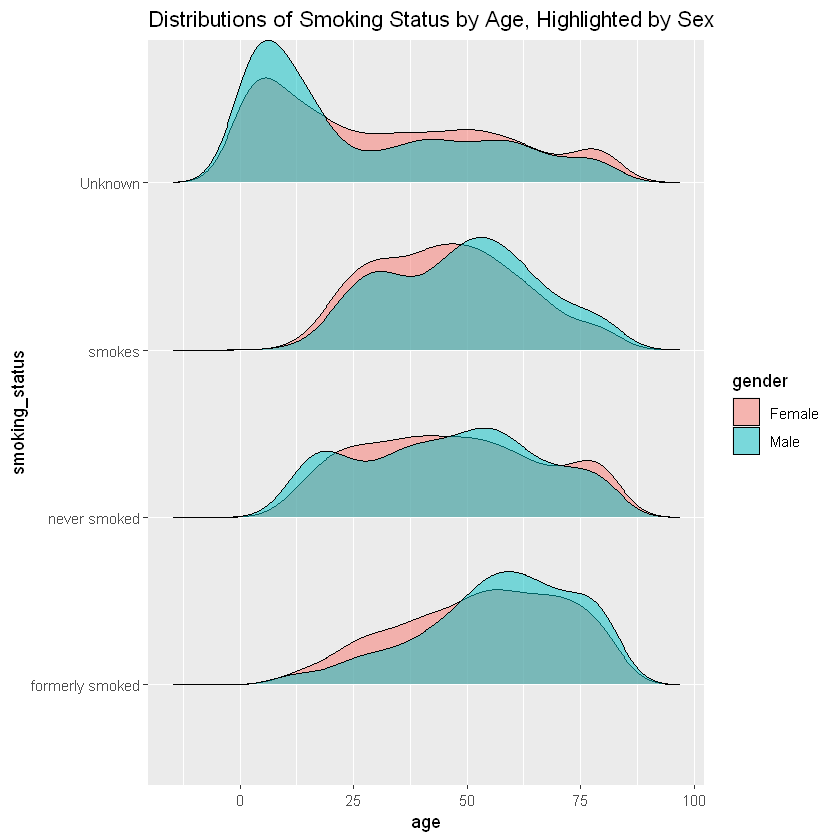

Picking joint bandwidth of 4.15


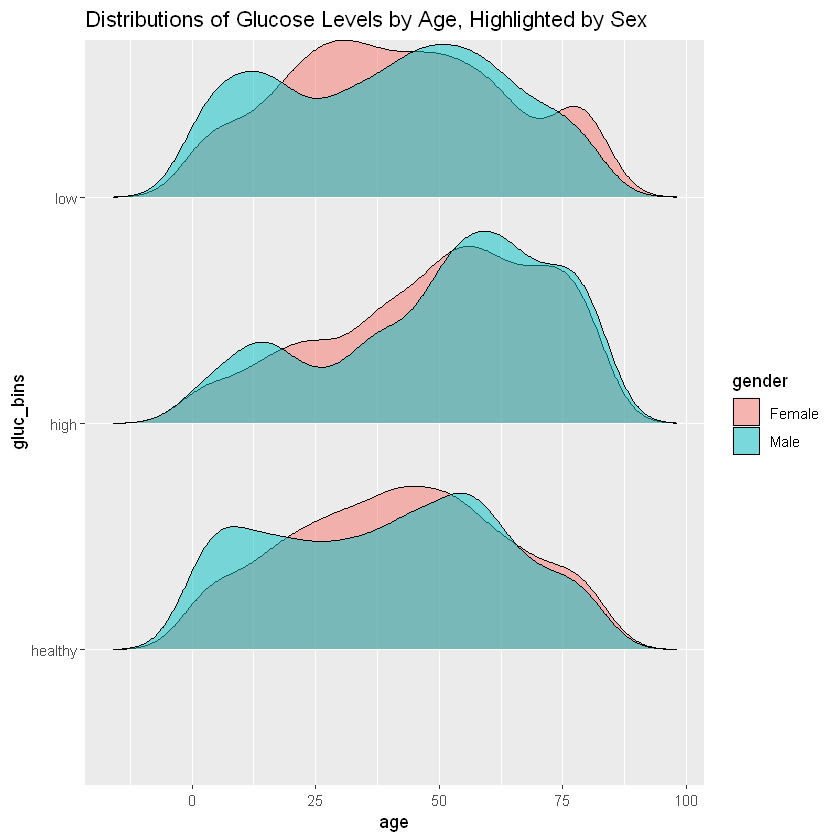

Picking joint bandwidth of 3.51


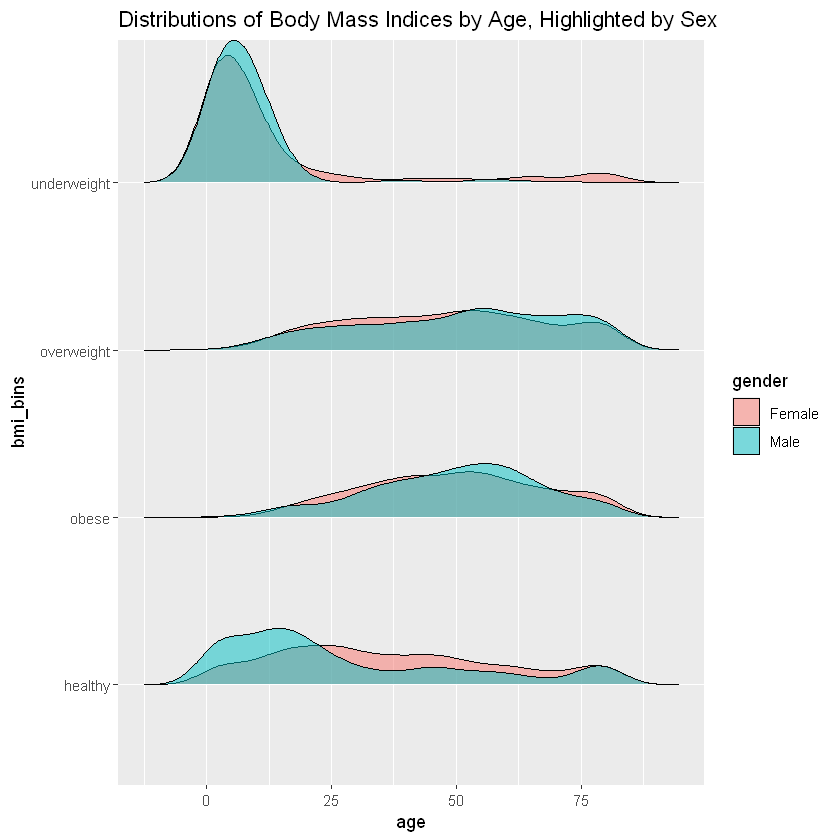

Picking joint bandwidth of 3.25


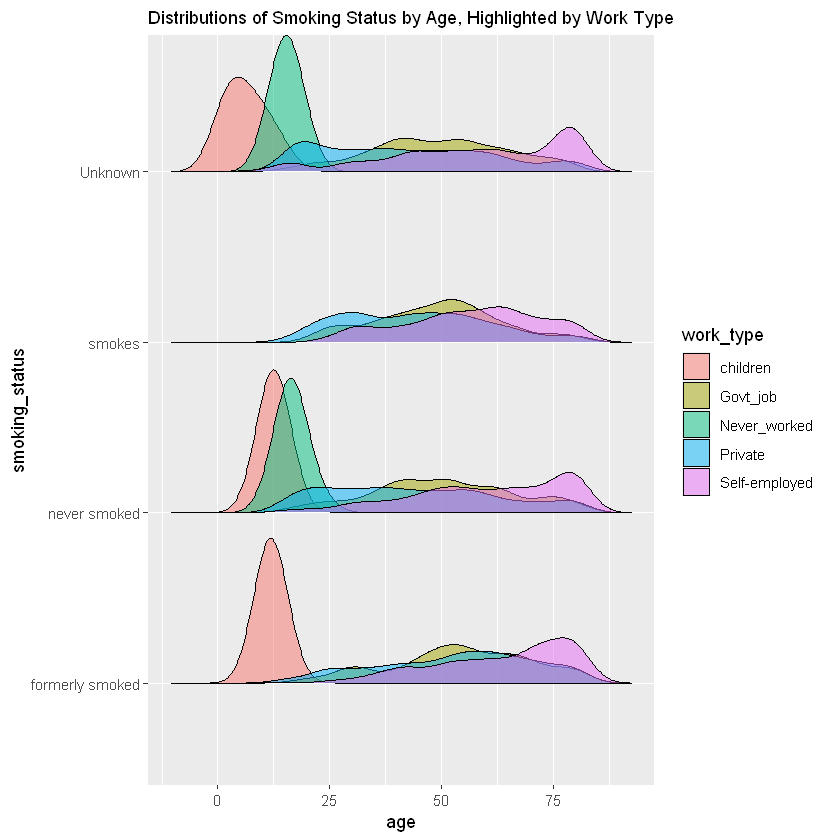

Picking joint bandwidth of 4.1


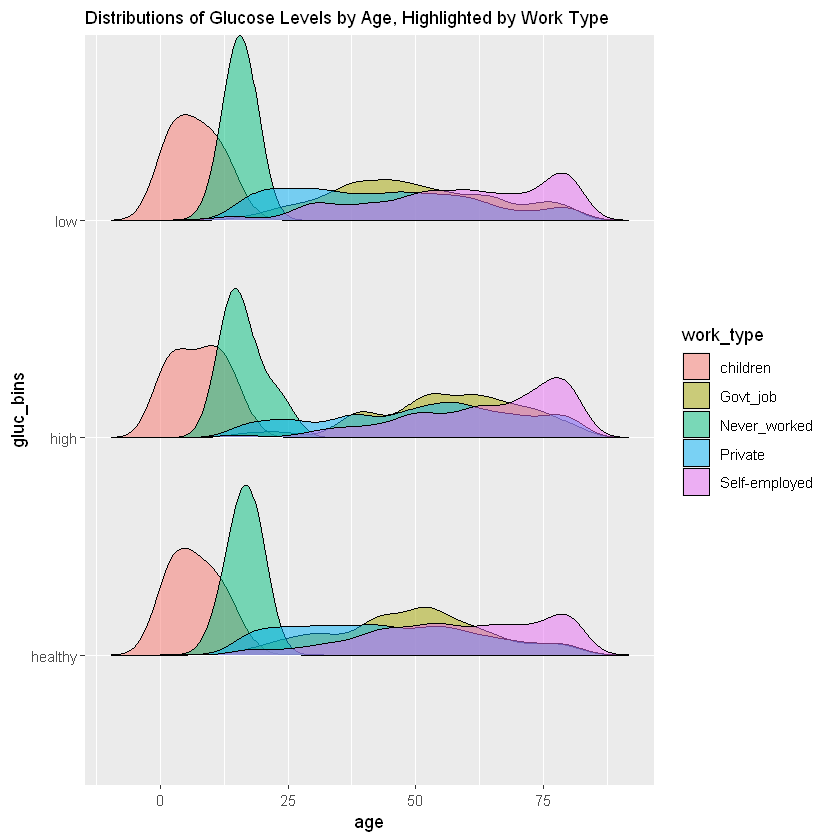

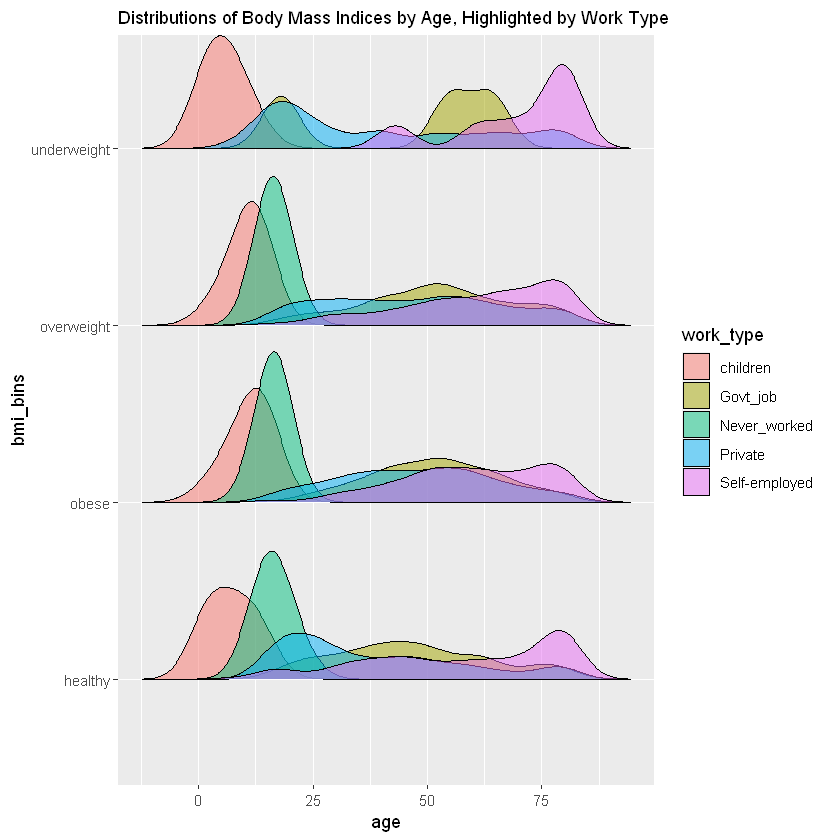

In [9]:
#doesnt like bins so let's change from numeric to character

df$gluc_bins <- as.character(df$gluc_bins)
df$bmi_bins <- as.character(df$bmi_bins)

#age and gender vs 
ggplot(df, aes(x=age, y=smoking_status, fill=gender)) + geom_density_ridges(scale=.85, alpha = 0.5) + 
  ggtitle("Distributions of Smoking Status by Age, Highlighted by Sex") + 
  theme(plot.title = element_text(size=13))
ggplot(df, aes(x=age, y=gluc_bins, fill=gender)) + geom_density_ridges(scale=.85, alpha = 0.5) + 
  ggtitle("Distributions of Glucose Levels by Age, Highlighted by Sex") + 
  theme(plot.title = element_text(size=13))
ggplot(df, aes(x=age, y=bmi_bins, fill=gender)) + geom_density_ridges(scale=.85, alpha = 0.5) + 
  ggtitle("Distributions of Body Mass Indices by Age, Highlighted by Sex") + 
  theme(plot.title = element_text(size=13))

#age and work type vs
ggplot(df, aes(x=age, y=smoking_status, fill=work_type)) + geom_density_ridges(scale=.85, alpha = 0.5) + 
  ggtitle("Distributions of Smoking Status by Age, Highlighted by Work Type") + 
  theme(plot.title = element_text(size=11))
ggplot(df, aes(x=age, y=gluc_bins, fill=work_type)) + geom_density_ridges(scale=.85, alpha = 0.5) + 
  ggtitle("Distributions of Glucose Levels by Age, Highlighted by Work Type")+ 
  theme(plot.title = element_text(size=11))
ggplot(df, aes(x=age, y=bmi_bins, fill=work_type)) + geom_density_ridges(scale=.85, alpha = 0.5) + 
  ggtitle("Distributions of Body Mass Indices by Age, Highlighted by Work Type")+ 
  theme(plot.title = element_text(size=11))

Most of the high glucose sample is populated by either children or people over 50 years old. Most of our healthy bmi sample between 25 and 75 years old is populated by females. There is a slight peak in the amount of people populating our overweight/obese samples at around 55 years old. Besides adolescents, most of our formerly smoked sample is populated by people 50-80 years old. Much of our currently smoking sample is populated by people working government jobs/self employed and 50-65 years old. There are many underweight people working government jobs at 60 years old.